## Déscription de la recherche de données et la création de graphiques
Les graphiques ci-dessous se concentrent exclusivement sur les couples.  
Ainsi toutes les données récupérées sont les données prises à partir de couples.  
Par exemple, lorsque je fais un graphique représentant les sources des bactéries, je me réfère seulement aux bactéries présentent dans les couples.  
Je peux ainsi me concentrer sur l'utilisation unique de l'API.  
Cela pose tout de même une certaine limitation. Je suis limité par la taille des requêtes que j'effectue. Ceci est principalement dû à la sérialisation qui s'opère lors d'une requête.  

Afin de rendre de pouvoir réutiliser facilement les éléments de la base de données, j'ai décidé de construire différents dictionnaires. Je ne dois alors charger le programme qu'une seule fois.  
Par la suite j'ai accès à toutes les informations dans chaque blocs que je crée. 

In [1]:
import matplotlib.pyplot as plt

from configuration.configuration_api import ConfigurationAPI
from rest_client.AuthenticationRest import AuthenticationAPI

from objects_API.CoupleJ import CoupleJson
from objects_API.BacteriumJ import BacteriumJson
from objects_API.StrainJ import StrainJson
from objects_API.SpecieJ import SpecieJson
from objects_API.GenusJ import GenusJson
from objects_API.FamilyJ import FamilyJson
from objects_API.SourceDataJ import SourceDataJson

conf_obj = ConfigurationAPI()
conf_obj.load_data_from_ini()
AuthenticationAPI().createAutenthicationToken();

### Fonctions générales permettant de récupérer un certains nombres de données

In [2]:
#get all couples of the DB inphinity
def getAllOfCouples():
        list_couples = CoupleJson.getAllAPI()
        return list_couples

#get all Strain of the DB inphinity
def getAllOfStrain():
        list_strain = StrainJson.getAllAPI()
        return list_strain
    
#get all Genus of the DB inphinity
def getAllOfGenus():
        list_genus = GenusJson.getAllAPI()
        return list_genus

#get all Family of the DB inphinity
def getAllOfFamily():
        list_family = FamilyJson.getAllAPI()
        return list_family

#get all SourceData of the DB inphinity
def getAllOfSourceData():
        list_source_data = SourceDataJson.getAllAPI()
        return list_source_data

### Création d'un dictionnaire qui contiendra toutes les bactéries présentes dans les couples

In [3]:
#get all couples in a list
list_of_couples = getAllOfCouples()
bacterie_found = 0

#dictionnary {bacterie : nbr of bacteries}
bacteries_dictionnary = {}
for couple in list_of_couples:
        bacterie_found = 0
        for bacterie in bacteries_dictionnary.keys():
                #check if there is already the id of the bacterium in the dictionnary
                if couple.bacterium == bacterie.id:
                        #increase de number of the bacterie whith this id
                        bacteries_dictionnary[bacterie] += 1
                        bacterie_found = 1
                        break

        #if we hadn't found the bacterie we add it in the dictionnary
        if bacterie_found != 1 :
            #add the key-value : bacterie
            bacteries_dictionnary[BacteriumJson.getByID(couple.bacterium)] = 1

#dictionnary {bactoriphage_id : nbr of bacteries}
phages_dictionnary = {}
for couple in list_of_couples:
        #check if there is already the id of the bacterium in the dictionnary
        if not couple.bacteriophage in phages_dictionnary.keys():
                #add the key-value : bacterie_id
                phages_dictionnary[couple.bacteriophage] = 0
        #increase de number of the bacterie whith this id
        phages_dictionnary[couple.bacteriophage] += 1

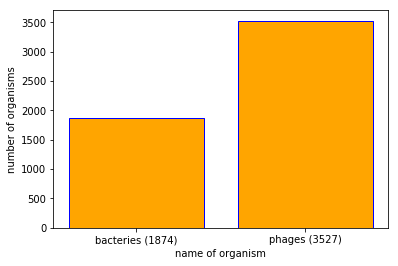

In [4]:
fig, axs = plt.subplots()

number_of_bact_and_phage = [len(bacteries_dictionnary), len(phages_dictionnary)]
name = ["bacteries (" + str(number_of_bact_and_phage[0]) + ")", "phages (" + str(number_of_bact_and_phage[1]) + ")"]
axs.set_ylabel('number of organisms')
axs.set_xlabel('name of organism')
plt.bar(name, number_of_bact_and_phage, width = 0.8, color = 'orange', edgecolor = 'b');

### Création d'un dictionnaire qui contiendra toutes les souches des bactéries

In [5]:
#dictionnary {strain_name : number of bacteries in this strain}
strain_dictionnary = {}
strain_found = 0
for bacterie in bacteries_dictionnary.keys():
        #get the strain_id from the bacterie
        strain_id = bacterie.strain
        for strain in strain_dictionnary.keys():
                strain_found = 0
                #check if there is already the id of the strain in the dictionnary
                if strain_id == strain.id:
                         #increase de number of the bacterie of this strain
                        strain_dictionnary[strain] += 1
                        strain_found = 1
                        break
        #if we hadn't found the strain we add it in the dictionnary
        if strain_found != 1 :
                #add the key-value : strain
                strain_dictionnary[StrainJson.getByID(bacterie.strain)] = 1

### Création d'un dictionnaire qui contiendra toutes les espèces de bactéries présentes dans les couples

In [6]:
specie_dictionnary = {}

#dictionnary {specie : number of strain belong to this specie}
specie_dictionnary = {}
specie_found = 0

for strain in strain_dictionnary.keys():
        #get the specie_id from the strain
        specie_id = strain.specie
        for specie in specie_dictionnary.keys():
                specie_found = 0
                #check if there is already the specie in the dictionnary
                if specie_id == specie.id:
                    #increase de number of the strain of this specie
                    specie_dictionnary[specie] += 1
                    specie_found = 1
                    break
        #if we hadn't found the specie we add it in the dictionnary
        if specie_found != 1 :
                #add the key-value : specie
                specie_dictionnary[SpecieJson.getByID(strain.specie)] = 1

### Création d'un dictionnaire qui contiendra tous les genres de bactéries présents dans les couples

In [7]:
#dictionnary {genus : number of species belong to this genus}
genus_dictionnary = {}
genus_found = 0

for specie in specie_dictionnary.keys():
        #get the genus id from the specie
        genus_id = specie.genus
        for genus in genus_dictionnary.keys():
                genus_found = 0
                #check if there is already the genus in the dictionnary
                if genus_id == genus.id:
                        #increase de number of the specie of this genus
                        genus_dictionnary[genus] += 1
                        genus_found = 1
                        break
        #if we hadn't found the genus we add it in the dictionnary
        if genus_found != 1 :
                #add the key-value : genus
                genus_dictionnary[GenusJson.getByID(specie.genus)] = 1

### Création d'un dictionnaire qui contiendra toutes les familles de bactéries présentes dans les couples

In [8]:
#dictionnary {family : number of genus in this family}
family_dictionnary = {}
family_found = 0

for genus in genus_dictionnary.keys():
        #get the family id from the genus
        family_id = genus.family
        for family in family_dictionnary.keys():
                family_found = 0
                #check if there is already the family in the dictionnary
                if family_id == family.id:
                        #increase de number of the genus belong to this family
                        family_dictionnary[family] += 1
                        family_found = 1
                        break
        #if we hadn't found the family we add it in the dictionnary
        if family_found != 1 :
                #add the key-value : family
                family_dictionnary[FamilyJson.getByID(genus.family)] = 1


### Création des graphiques

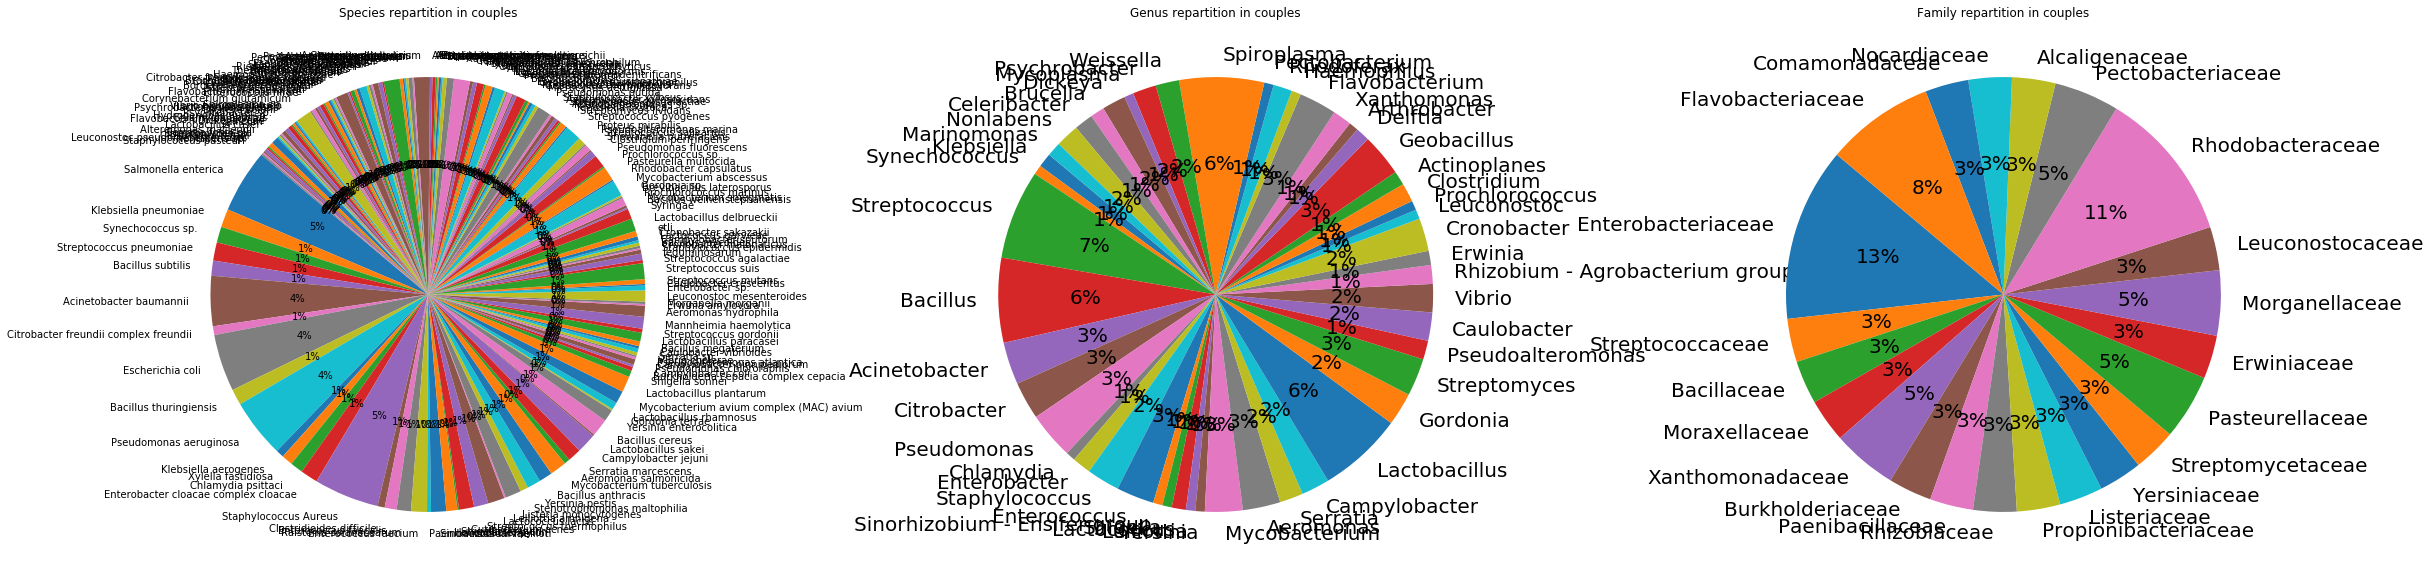

In [9]:
fig, axs = plt.subplots(1,3, figsize=(40, 10))

#species repartition chart
number_of_species_tab = []
species_name = []
for specie, number_of_species in specie_dictionnary.items():
        #take only specie with more than one souche
        if number_of_species > 1:
                number_of_species_tab.append(number_of_species)
                species_name.append(specie.designation)
                
#genus repartition chart
number_of_genus_tab = []
genus_name = []
for genus, number_of_genus in genus_dictionnary.items():
        #take only specie with more than one souche
        if number_of_genus > 1:
                number_of_genus_tab.append(number_of_genus)
                genus_name.append(genus.designation)

#family repartition chart
number_of_family_tab = []
family_name = []
for family, number_of_family in family_dictionnary.items():
        #take only specie with more than one souche
        if number_of_family > 1:
                number_of_family_tab.append(number_of_family)
                family_name.append(family.designation)
        
axs[0].set_title("Species repartition in couples")
axs[0].pie(number_of_species_tab, labels=species_name, autopct='%1.0f%%', startangle=140, textprops={'size': 10});
axs[1].set_title("Genus repartition in couples")
axs[1].pie(number_of_genus_tab, labels=genus_name, autopct='%1.0f%%', startangle=140, textprops={'size': 20});
axs[2].set_title("Family repartition in couples")
axs[2].pie(number_of_family_tab, labels=family_name, autopct='%1.0f%%', startangle=140, textprops={'size': 20});


### Graphiques concernant la provenance des informations sur les bactéries (Source Data)

In [10]:
source_data_list = getAllOfSourceData()
source_data_dictionnary = {}

for source_data in source_data_list:
        source_data_dictionnary[source_data] = 0
        
for bacterie in bacteries_dictionnary.keys():
        #get the source data id from the bacterie
        source_data_id = bacterie.source_data
        for source_data in source_data_dictionnary.keys():
                if source_data_id == source_data.id:
                        #increase de number of the bacteries managed by this source_data id
                        source_data_dictionnary[source_data] += 1
                        
#For the charts
number_of_bacterie_tab1 = []
source_data_name1 = []
for source_data, number_of_bacterie in source_data_dictionnary.items():
        #take only source data with more than one bacterie
        if number_of_bacterie > 0:
                number_of_bacterie_tab1.append(number_of_bacterie)
                source_data_name1.append(source_data.designation)

In [11]:
for source_data in source_data_list:
        source_data_dictionnary[source_data]= 0

for couple in list_of_couples:
        #get the strain designation from the bacterie
        source_data_id = couple.source_data
        for source_data in source_data_dictionnary.keys():
                source_data_found = 0
                if source_data_id == source_data.id:
                        #increase de number of the couple managed by this source_data id
                                source_data_dictionnary[source_data] += 1  
                            
#For the charts
number_of_bacterie_tab2 = []
source_data_name2 = []
for source_data, number_of_bacterie in source_data_dictionnary.items():
        #take only specie with more than one bacterie
        if number_of_bacterie > 0:
                number_of_bacterie_tab2.append(number_of_bacterie)
                source_data_name2.append(source_data.designation)

In [12]:
#dictionnary : public couples (couples where source_data = NCBI or PhagesDB)
public_couples = []

#Id of public database
NCBI = 1
PhagesDB = 2

Strain = 1
Specie = 2
Genus = 3
Family = 4

#add the public couple in the list
for couple in list_of_couples:
         if couple.source_data == NCBI or couple.source_data == PhagesDB:
                public_couples.append(couple) 

taxonomie_dictionnary = {Strain: 0, Specie:0, Genus:0, Family:0}

#taxonomie repartition
for couple in public_couples:
        taxonomie_dictionnary[couple.level] += 1
        
#For the charts
number_of_bacterie_tab3 = []
taxonomie_name = ['Strain', 'Specie', 'Genus', 'Family']
for taxonomie, number_of_bacterie in taxonomie_dictionnary.items():
        #take only specie with more than one bacterie
        number_of_bacterie_tab3.append(number_of_bacterie)

        

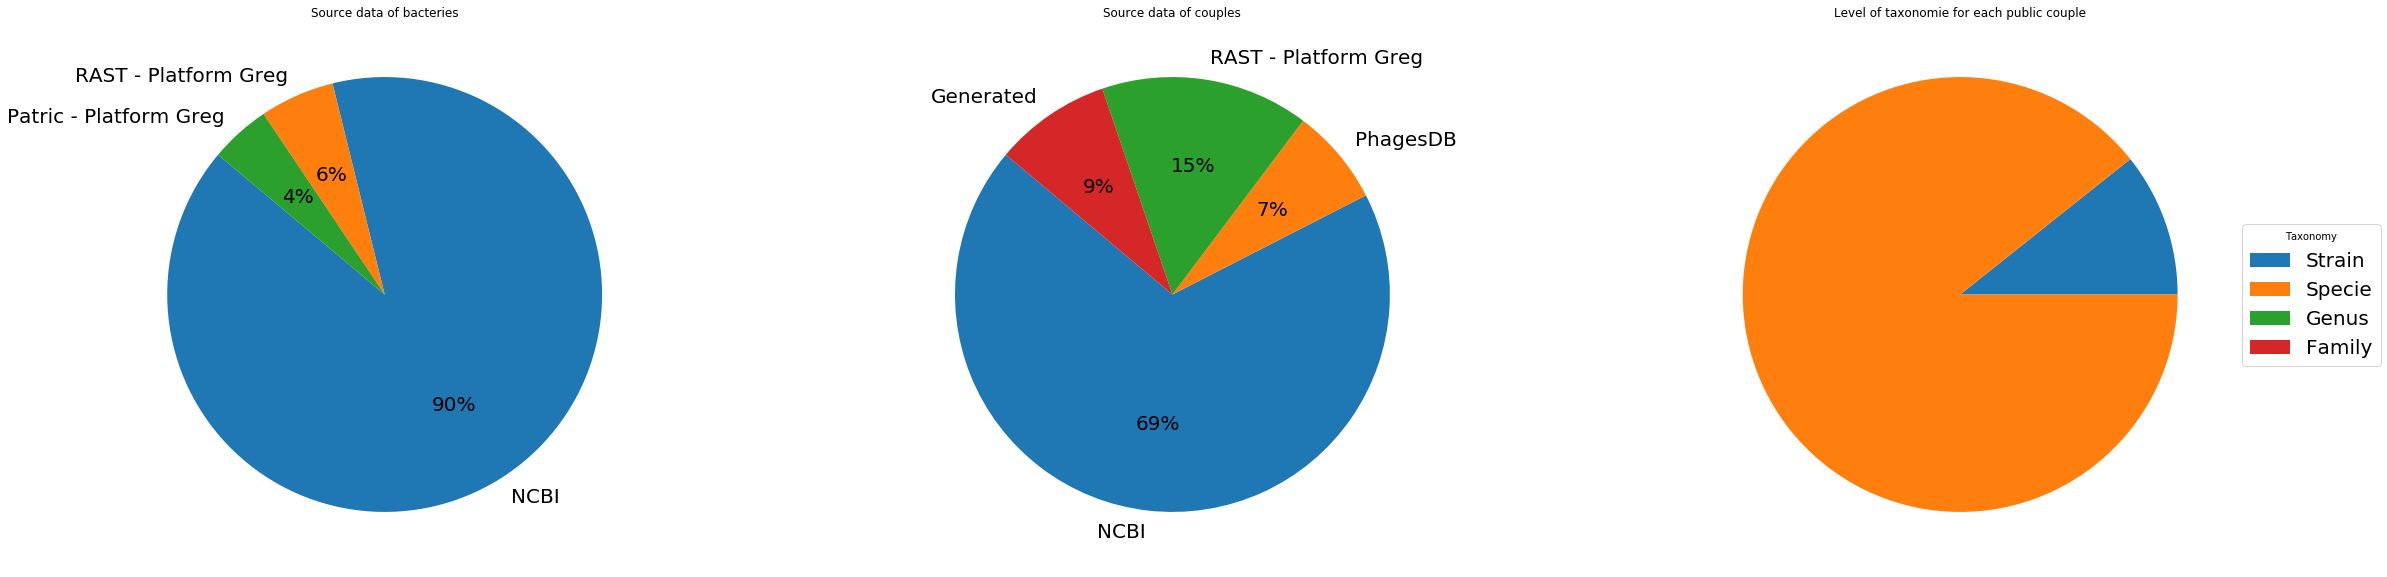

In [13]:
#display charts
    
fig, axs = plt.subplots(1,3, figsize=(40, 10))
axs[0].set_title("Source data of bacteries")
axs[0].pie(number_of_bacterie_tab1, labels=source_data_name1, autopct='%1.0f%%', startangle=140, textprops={'size': 20});
axs[1].set_title("Source data of couples")
axs[1].pie(number_of_bacterie_tab2, labels=source_data_name2, autopct='%1.0f%%', startangle=140, textprops={'size': 20});
axs[2].set_title("Level of taxonomie for each public couple")
wedges, autotexts = axs[2].pie(number_of_bacterie_tab3, textprops=dict(color="w"))
axs[2].legend(wedges, taxonomie_name,
          title="Taxonomy",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop={'size': 20});

### Graphiques sur la répartition des couples selon leur activité, lysis et types d'interactions

In [14]:
#ID of each variable for the validity (found in inphinity DB)
laboratory_tested = 1
valide_in_the_middle = 2
no_valid = 3
not_validate = 4

#ID of each variable for the lysis (found in inphinity DB)
clear_lysis = 5
semi_clear_lysis = 6
opaque_lysis = 7
clear_lysis_more_1e7 = 8
clear_lysis_less_1e7 = 9
semi_clear_lysis_more_1e7 = 10
semi_clear_lysis_less_1e7 = 11

#ID of each variable for the interaction type (found in inphinity DB)
false = 0
true = 1

#dictionnary declaration
validity_of_couple_dictionnary = {laboratory_tested:0, valide_in_the_middle:0, no_valid:0, not_validate:0}

lysis_dictionnary = {clear_lysis:0, semi_clear_lysis:0, opaque_lysis:0,
                        clear_lysis_more_1e7:0, clear_lysis_less_1e7:0,
                        semi_clear_lysis_more_1e7:0, semi_clear_lysis_less_1e7:0}

interaction_type_dictionnary = {true:0, false:0}

for couple in list_of_couples:
    
    if couple.lysis in lysis_dictionnary.keys():
        lysis_dictionnary[couple.lysis] += 1
        
    if couple.validity in validity_of_couple_dictionnary.keys():
        validity_of_couple_dictionnary[couple.validity] += 1

    if couple.interaction_type in interaction_type_dictionnary.keys():
        interaction_type_dictionnary[couple.interaction_type] += 1
        

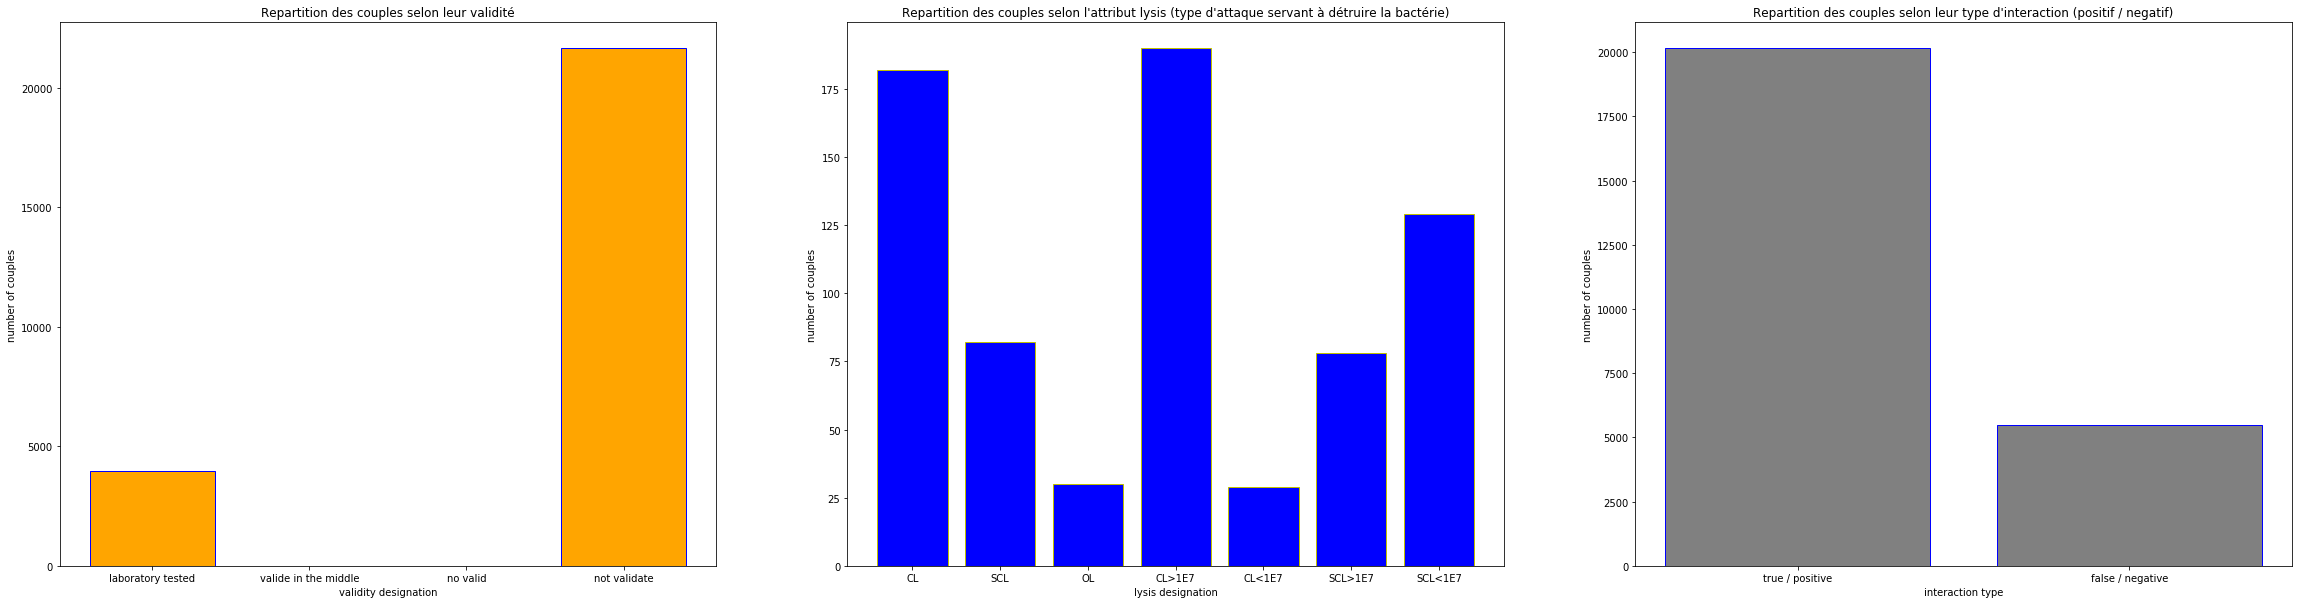

In [15]:
#to display the charts
fig, axs = plt.subplots(1,3, figsize=(40,10))

validity_name = ['laboratory tested', 'valide in the middle','no valid','not validate']
validity_value = [0,0,0,0]

lysis_name = ['CL','SCL','OL','CL>1E7','CL<1E7',
             'SCL>1E7','SCL<1E7']
lysis_value = [0,0,0,0,0,0,0]

interaction_type_name = ['true / positive', 'false / negative']
interaction_value = [0,0]

i = 0
for value in validity_of_couple_dictionnary.values():
    validity_value[i] = value
    i += 1
    
i = 0
for value in lysis_dictionnary.values():
    lysis_value[i] = value
    i += 1
    
i = 0
for value in interaction_type_dictionnary.values():
    interaction_value[i] = value
    i += 1
    
axs[0].set_title("Repartition des couples selon leur validité")
axs[0].set_ylabel('number of couples')
axs[0].set_xlabel('validity designation')
axs[0].bar(validity_name,validity_value, width = 0.8, color = 'orange', edgecolor = 'b');
axs[1].set_title("Repartition des couples selon l'attribut lysis (type d'attaque servant à détruire la bactérie)")
axs[1].set_ylabel('number of couples')
axs[1].set_xlabel('lysis designation')
axs[1].bar(lysis_name, lysis_value, width = 0.8, color = 'b', edgecolor = 'y');
axs[2].set_title("Repartition des couples selon leur type d'interaction (positif / negatif)")
axs[2].set_ylabel('number of couples')
axs[2].set_xlabel('interaction type')
axs[2].bar(interaction_type_name, interaction_value, width = 0.8, color = 'gray', edgecolor = 'b');